In [1]:
import cv2
import imutils
from numpy.linalg import norm
import numpy as np
cv2.__version__
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('paragon_3.jpg')
image.shape

(600, 450, 3)

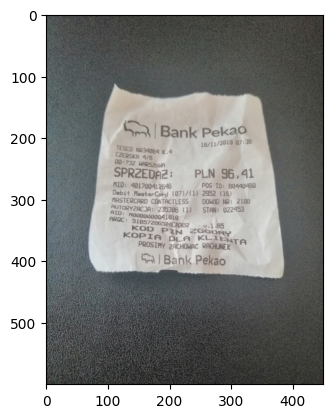

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
orginal_image = image.copy()
ratio = image.shape[0] / 500.0
image = imutils.resize(image, height=500)
image.shape

(500, 375, 3)

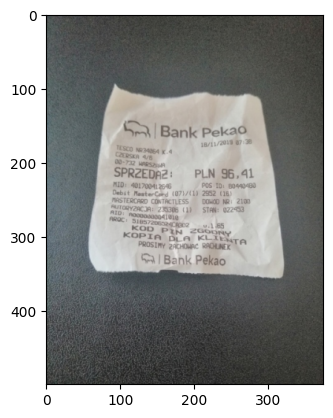

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

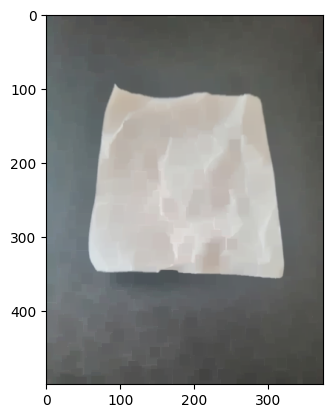

In [6]:
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations= 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

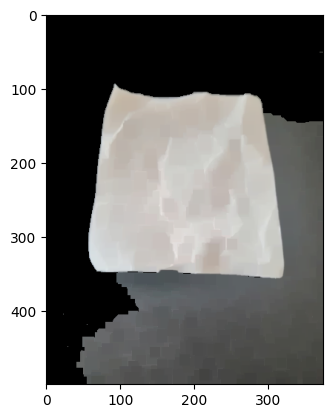

In [7]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (3,3,img.shape[1]-3,img.shape[0]-3)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

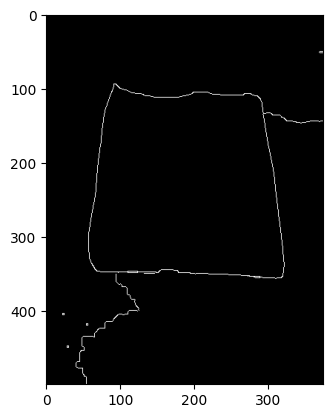

In [8]:
edges = cv2.Canny(img, threshold1=75, threshold2=200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [9]:
contours = cv2.findContours(image=edges.copy(), mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(f'Liczba wszystkich wyszukanych punktów (kontur): {len(contours)}')
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

for contour in contours:
    print(len(contour))

Liczba wszystkich wyszukanych punktów (kontur): 14
307
252
6
107
6


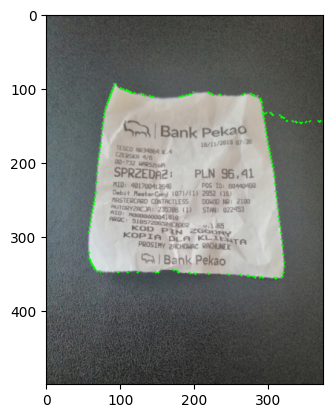

In [10]:
cnt1 = cv2.drawContours(image.copy(), contours[0], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(cnt1, cv2.COLOR_BGR2RGB))

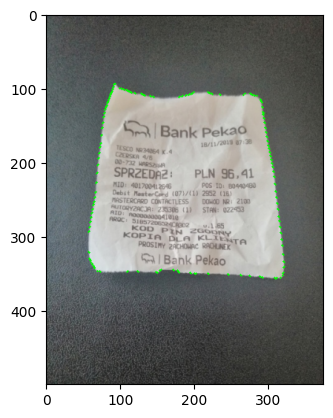

In [11]:
cnt2 = cv2.drawContours(image.copy(), contours[1], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(cnt2, cv2.COLOR_BGR2RGB))

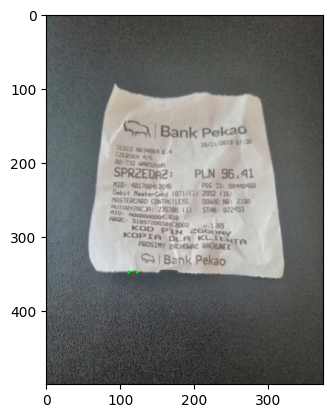

In [12]:
cnt3 = cv2.drawContours(image.copy(), contours[2], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(cnt3, cv2.COLOR_BGR2RGB))

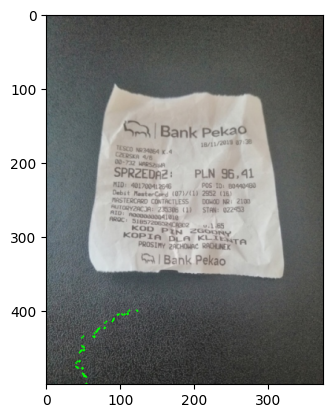

In [13]:
cnt4 = cv2.drawContours(image.copy(), contours[3], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(cnt4, cv2.COLOR_BGR2RGB))

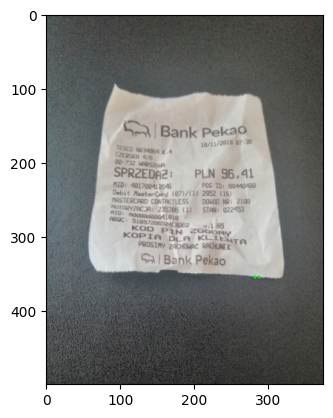

In [14]:
cnt5 = cv2.drawContours(image.copy(), contours[4], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(cnt5, cv2.COLOR_BGR2RGB))

In [15]:
for contour in contours:
    print('Sprawdzanie...')
    perimeter = cv2.arcLength(curve=contour, closed=True)
    
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.02 * perimeter, closed=True)

    if len(approx) ==4:
        screen_contour = approx
        break
    
print(screen_contour)

Sprawdzanie...
Sprawdzanie...
[[[ 92  94]]

 [[289 115]]

 [[316 356]]

 [[ 65 343]]]


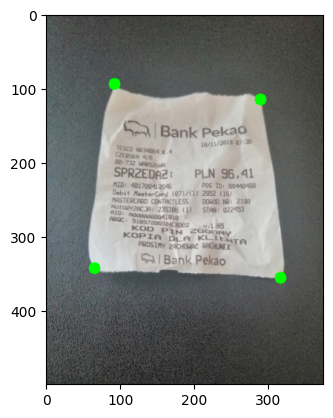

In [16]:
cv2.drawContours(image, screen_contour, -1, (0, 255, 0), 15)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [17]:
points = screen_contour.reshape(4, 2)
points = points * ratio
points

array([[110.4, 112.8],
       [346.8, 138. ],
       [379.2, 427.2],
       [ 78. , 411.6]])

In [18]:
rectanle = np.zeros((4, 2), dtype='float32')
rectanle

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [19]:
total = points.sum(axis=1)

rectanle[0] = points[np.argmin(total)]
rectanle[2] = points[np.argmax(total)]
rectanle

array([[110.4, 112.8],
       [  0. ,   0. ],
       [379.2, 427.2],
       [  0. ,   0. ]], dtype=float32)

In [20]:
difference = np.diff(points, axis=1)
rectanle[1] = points[np.argmin(difference)]
rectanle[3] = points[np.argmax(difference)]
rectanle

array([[110.4, 112.8],
       [346.8, 138. ],
       [379.2, 427.2],
       [ 78. , 411.6]], dtype=float32)

In [21]:
(a, b, c, d) = rectanle

width1 = norm(c - b)
width2 = norm(b - a)
max_width = max(int(width1), int(width2))

hight1 = norm(b - c)
hight2 = norm(a - d)
max_hight = max(int(hight1), int(hight2))

print(f'max_width: {max_width}')
print(f'max_hight: {max_hight}')

max_width: 291
max_hight: 300


In [22]:
vertices = np.array([
    [0, 0],
    [max_width -1, 0],
    [max_width -1, max_hight -1],
    [0, max_hight -1]
], dtype='float32')
    
vertices

array([[  0.,   0.],
       [290.,   0.],
       [290., 299.],
       [  0., 299.]], dtype=float32)

In [23]:
M =cv2.getPerspectiveTransform(rectanle, vertices)
M

array([[ 1.25067402e+00,  1.35615260e-01, -1.53371815e+02],
       [-1.45705885e-01,  1.36686006e+00, -1.38095889e+02],
       [-3.01537275e-04,  9.84583484e-04,  1.00000000e+00]])

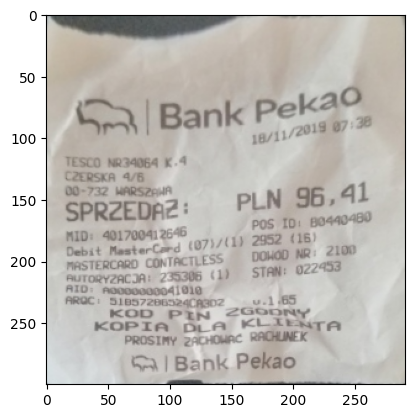

In [24]:
out = cv2.warpPerspective(src=orginal_image, M=M, dsize=(max_width, max_hight))
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))